In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/FinalProject/
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
nba_data = pd.read_csv("NBA_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/15rBGwhXsaVFbc7eU7PJNYrHs1ZBuJ5DI/FinalProject


In [ ]:
nba_data = pd.read_csv("NBA_data.csv")
clean_nba_data = nba_data.dropna()
X = clean_nba_data.iloc[:,1:-1]
y = clean_nba_data.AllNBA
X.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,23,ORL,78,78,33.8,6.0,13.4,0.449,1.6,4.4,0.349,4.5,9.0,0.499,0.507,2.4,3.2,0.731,1.7,5.7,7.4,3.7,0.7,0.7,2.1,2.2,16.0
1,PF,24,ORL,62,62,32.5,5.4,12.4,0.437,1.2,3.8,0.308,4.2,8.5,0.494,0.484,2.4,3.6,0.674,1.7,5.9,7.7,3.7,0.8,0.6,1.6,2.0,14.4
2,PG,22,IND,50,0,12.9,2.1,5.2,0.401,0.9,2.5,0.339,1.2,2.7,0.459,0.483,0.8,1.0,0.820,0.1,1.2,1.3,1.7,0.4,0.3,0.8,1.4,5.9
3,PG,23,IND,66,33,24.5,3.5,8.5,0.414,1.3,3.3,0.394,2.2,5.2,0.427,0.491,1.1,1.3,0.851,0.3,2.0,2.4,3.4,0.8,0.2,1.3,1.8,9.5
4,SF,25,OKC,61,1,11.4,1.5,3.5,0.423,0.5,1.6,0.320,1.0,1.9,0.513,0.498,0.4,0.6,0.750,0.2,1.7,1.9,0.3,0.3,0.2,0.4,1.1,4.0


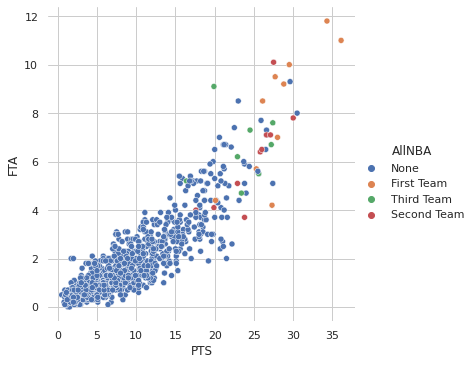

In [ ]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=clean_nba_data,
    x="PTS", y="FTA",
    hue="AllNBA")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

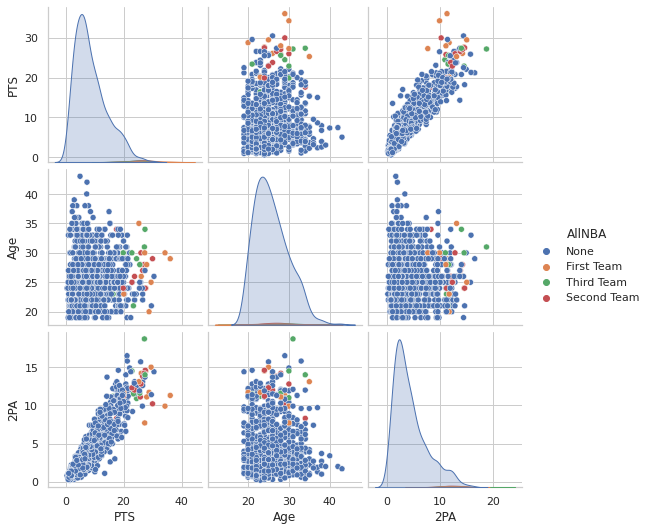

In [ ]:
sns.pairplot(clean_nba_data, hue = 'AllNBA', vars=('PTS', 'Age', '2PA'))

In [ ]:
X["Pos"] = X["Pos"].astype('category')
X["Tm"] = X["Tm"].astype('category')
y = y.astype('category')

X["Pos"] = X["Pos"].cat.codes
X["Tm"] = X["Tm"].cat.codes
y = y.cat.codes

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3, random_state= 0)
LogReg = LogisticRegression()
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)
print('Classes',LogReg.classes_)
print('Intercept', LogReg.intercept_)
print('Coefficients',LogReg.coef_)

Classes [0 1 2 3]
Intercept [-7.65475381 12.29691451 -0.50912156 -4.13303914]
Coefficients [[-1.76152712e-02  3.05202403e-01 -2.38315997e-01  2.51466527e-01
   1.94329179e-01 -8.10424639e-02  1.45429871e-01  1.89052540e-02
   1.50911543e-01  1.23608153e-01  2.87933421e-01 -3.28600170e-02
   1.06440577e-01 -1.62897165e-01  3.97454480e-01  1.87566973e-01
   2.64597873e-01  3.84090033e-01 -1.84728789e-01  1.59506647e-02
   3.71363124e-01  2.27749202e-01  2.77381118e-01 -6.96241290e-02
   4.64641810e-01  4.30504072e-01  1.26222796e-01  1.70987525e-01]
 [ 5.02115065e-01 -7.91344614e-01  3.58715679e-01 -5.20394908e-01
  -5.65441100e-01 -3.67714747e-01 -2.68326872e-01 -2.62120786e-01
  -2.20576595e-01  1.87940301e-02 -2.52119311e-01  4.62311075e-02
  -4.13099488e-01 -1.69809091e-01 -5.28780147e-01 -6.32791619e-02
  -4.08779827e-01 -3.95943954e-01 -1.91220049e-01  5.97130860e-01
  -6.61834769e-01 -2.49798396e-01 -2.55117671e-01 -7.97860156e-01
   2.07012463e-01  7.48316327e-02  2.07898334e-02 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.9618055555555556
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.98      1.00      0.99       277
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         3

    accuracy                           0.96       288
   macro avg       0.37      0.31      0.33       288
weighted avg       0.95      0.96      0.95       288



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[  1,   1,   1,   1],
       [  0, 276,   1,   0],
       [  1,   2,   0,   1],
       [  0,   3,   0,   0]])

Text(0.5, 257.44, 'Predicted label')

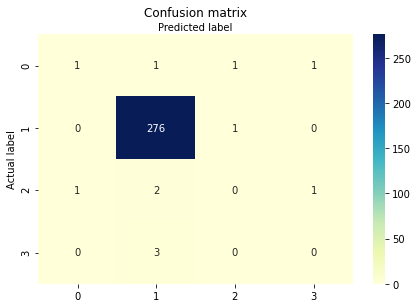

In [ ]:
categories = [0,1,2,3]
fig, ax= plt.subplots()
plt.xticks([0,1,2,3], categories)
plt.yticks([0,1,2,3],categories)
sns.heatmap(pd.DataFrame(conf_mat), annot = True, cmap= 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average= 'weighted'))
print('Recall' , recall_score(y_test, y_pred, average = 'weighted'))

Accuracy 0.9618055555555556
Precision 0.9482860520094563
Recall 0.9618055555555556


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size = 0.3, random_state= 0)
clf = DecisionTreeClassifier(criterion='entropy', random_state=99)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print('Accuracy', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred, average= 'weighted'))
print('Recall' , recall_score(y_test, y_pred, average = 'weighted'))

Accuracy 0.96875
Precision 0.9630127439267224
Recall 0.96875


In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[  1,   1,   0,   2],
       [  0, 277,   0,   0],
       [  2,   1,   1,   0],
       [  0,   0,   3,   0]])

[Text(610.3125, 1245.75, 'X[27] <= 2.178\nentropy = 0.21\nsamples = 671\nvalue = [6, 654, 6, 5]'),
 Text(209.25, 1019.25, 'X[22] <= 2.115\nentropy = 0.047\nsamples = 645\nvalue = [0, 642, 2, 1]'),
 Text(139.5, 792.75, 'entropy = 0.0\nsamples = 615\nvalue = [0, 615, 0, 0]'),
 Text(279.0, 792.75, 'X[15] <= 0.389\nentropy = 0.561\nsamples = 30\nvalue = [0, 27, 2, 1]'),
 Text(139.5, 566.25, 'X[26] <= -0.406\nentropy = 0.229\nsamples = 27\nvalue = [0, 26, 0, 1]'),
 Text(69.75, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(209.25, 339.75, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0, 0]'),
 Text(418.5, 566.25, 'X[4] <= 1.991\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2, 0]'),
 Text(348.75, 339.75, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0]'),
 Text(488.25, 339.75, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(1011.375, 1019.25, 'X[1] <= 0.409\nentropy = 1.834\nsamples = 26\nvalue = [6, 12, 4, 4]'),
 Text(837.0, 792.75, 'X[11] <= 0.136\nentropy =

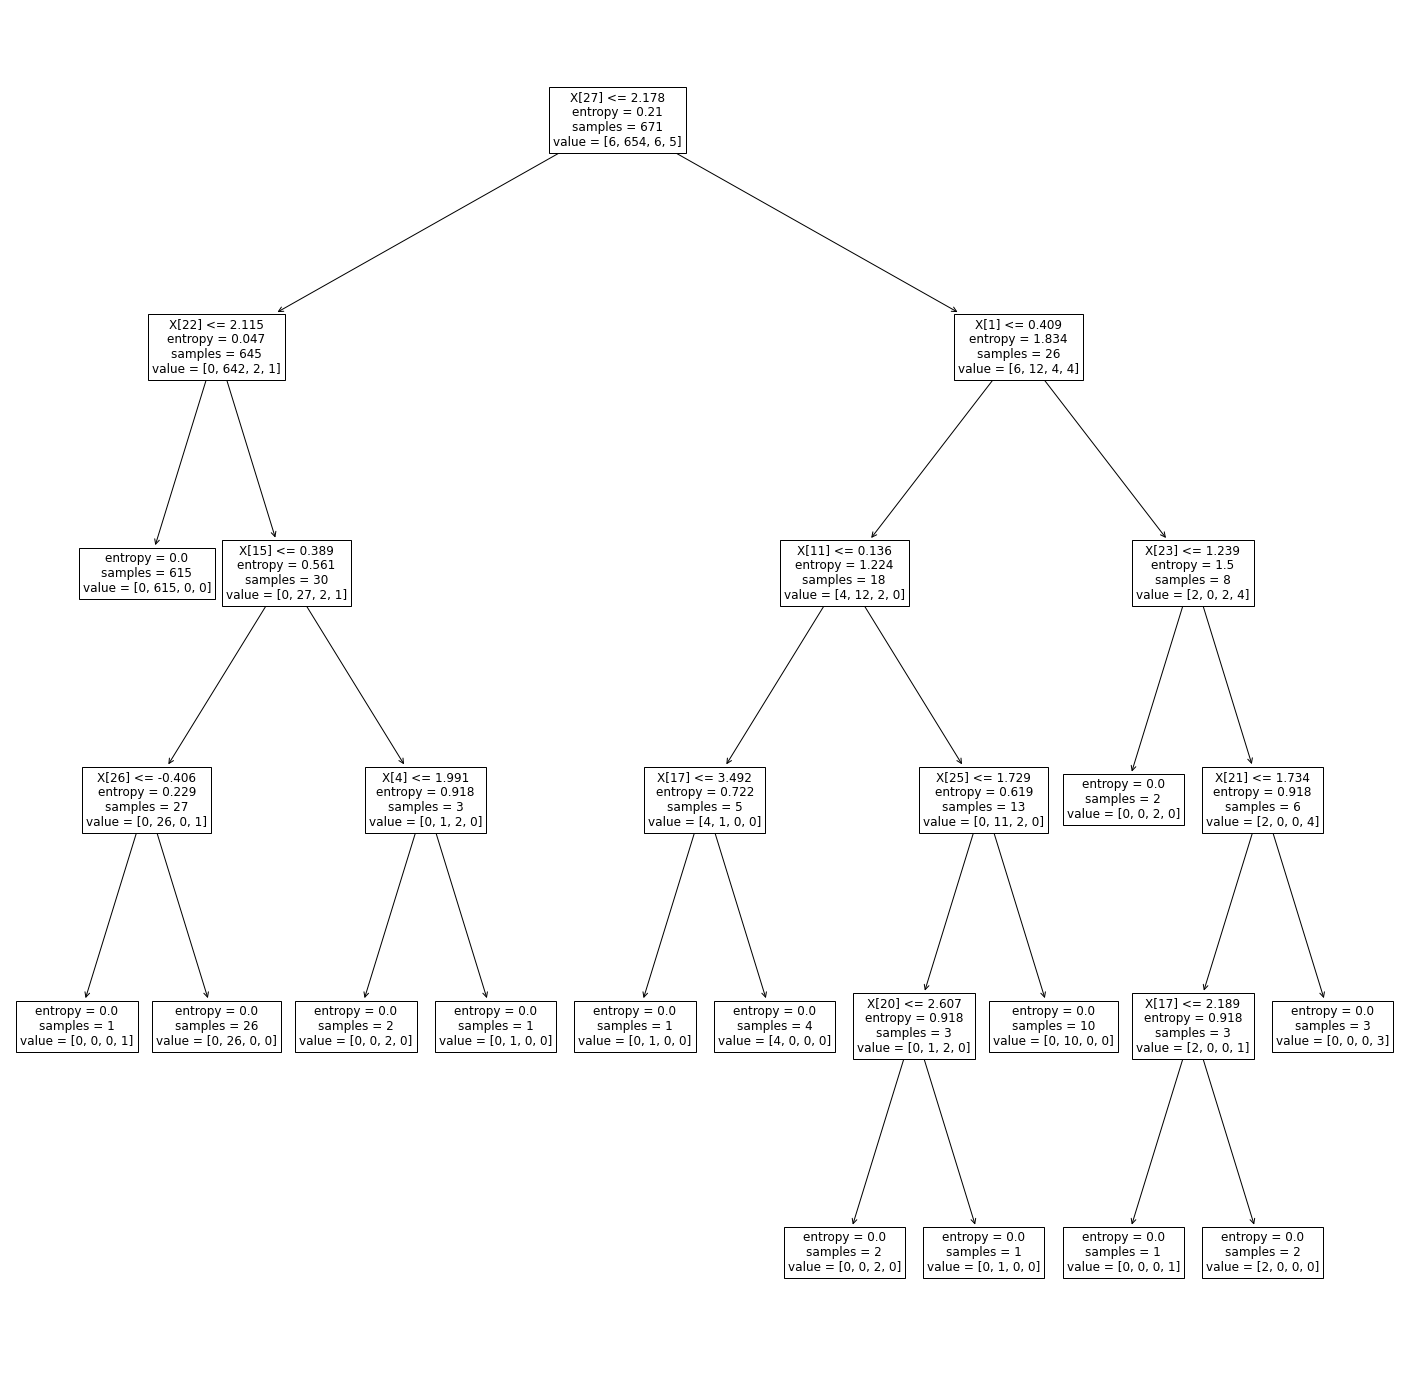

In [ ]:
fig, ax = plt.subplots(figsize = (25,25))
tree.plot_tree(decision_tree = clf, max_depth= 5, fontsize = 12)

In [ ]:
xg_cl = xgb.XGBClassifier(objective = 'multi:softprob', max_depth = 10, n_estimators = 20, seed = 99)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)

accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print('Accuracy: %f' %(accuracy))
print('Precision', precision_score(y_test, preds, average= 'weighted'))
print('Recall' , recall_score(y_test, preds, average = 'weighted'))

Accuracy: 0.961806
Precision 0.9416568857589984
Recall 0.9618055555555556


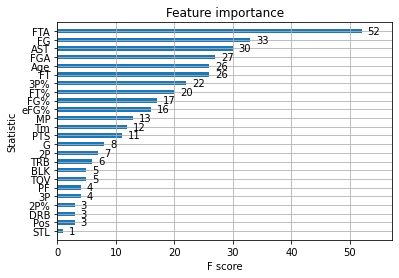

In [ ]:
xgb.plot_importance(xg_cl, ylabel = 'Statistic', height = 0.5)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28,)))
network.add(layers.Dense(1))
network.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])
network.fit(X_train, y_train, epochs=10)
print("Final loss value:", network.evaluate(X_test, y_test))

Epoch 1/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.5595
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9075
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9468
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0765 - accuracy: 0.9671
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.0764 - accuracy: 0.9709
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 0.0488 - accuracy: 0.9766
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9724
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9841
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.0410 - accuracy: 0.9802
Epoch 10/10
9/9 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9618
Final loss value: [0.

In [ ]:
import torch
import torch.nn as nn

X = clean_nba_data.iloc[:,1:-1]
y = clean_nba_data.AllNBA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(671, 28) (671,)
(288, 28) (288,)


In [ ]:
class Net(nn.Module):
  def __init__(self, n_features):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(n_features, 5)
    self.fc2 = nn.Linear(5, 3)
    self.fc3 = nn.Linear(3, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    return torch.sigmoid(self.fc3(x))
net = Net(X_train.shape[1])

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

def calculate_accuracy(y_true, y_pred):
  predicted = y_pred.ge(.5).view(-1)
  return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
  return round(t.item(), decimal_places)
for epoch in range(1000):
    y_pred = net(X_train)
    y_pred = torch.squeeze(y_pred)
    train_loss = criterion(y_pred, y_train)
    if epoch % 100 == 0:
      train_acc = calculate_accuracy(y_train, y_pred)
      y_test_pred = net(X_test)
      y_test_pred = torch.squeeze(y_test_pred)
      test_loss = criterion(y_test_pred, y_test)
      test_acc = calculate_accuracy(y_test, y_test_pred)
      print(
f'''epoch {epoch}
Train set - loss: {round_tensor(train_loss)}, accuracy: {round_tensor(train_acc)}
Test  set - loss: {round_tensor(test_loss)}, accuracy: {round_tensor(test_acc)}
''')
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

TypeError: ignored